<a href="https://colab.research.google.com/github/FisicoUrbano/Oscar/blob/master/Story_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stori Data Science Challenge

By Oscar Córdoba Rodríguez //
ocr@ciencias.unam.mx


For this challenge we will use a fake credit card dataset that is attached as *df.csv* , which
includes information from a [public Kaggle dataset](https://www.kaggle.com/arjunbhasin2013/ccdata) with three added fields: activated_date ,
last_payment_date and fraud.

Before to ask de questions it's necessary upload the file and make a brevary analysis.

# Descrine the data

In [1]:
import warnings
warnings.filterwarnings("ignore") # for the warnings about the versions libraries


In [2]:
# Import the libraries for data analysis
import pandas as pd # manipulate de data
import numpy as np # for any math function
import matplotlib.pyplot as plt # graphs
import seaborn as sns # graphs
from datetime import datetime # date format
# Import library for the model construction
import imblearn # for the treatment the unbalanced "fraud" variable
from imblearn.under_sampling import RandomUnderSampler # a random election for   "fraud" vairable

import tensorflow as tf # for the creation of the RNN model
from sklearn.model_selection import train_test_split # partition between train and test
from sklearn.metrics import confusion_matrix,accuracy_score # matrix confusion
# For ROC curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [3]:
df = pd.read_csv("/content/df.csv") #read the file,

#A view from the Dataframe

In [4]:
# Show the first 5 rows for all the variables

df.head()


,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10001,06/10/2019,09/09/2020,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,06/10/2019,04/07/2020,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,06/10/2019,17/09/2020,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,06/10/2019,24/08/2020,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,06/10/2019,20/10/2020,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [206]:
# Dimension of the Data Frame
df.shape

(8950, 21)

In [207]:
# Types of columns
df.dtypes

cust_id                              object
activated_date                       object
last_payment_date                    object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
fraud                                 int64
dtype: object

In [155]:
# Resume statistic, without any irregularity.
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.612804,0.877271,1003.204834,592.437371,411.067645,966.729700,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2081.502999,0.236904,2136.634782,1659.887917,904.338115,2089.417935,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.499186,0.292499,1.338331,0.088096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.877046,0.000000,12.000000,0.000000
50%,873.942013,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.694582,0.000000,12.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1096.905312,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.173246,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


In [275]:
# How many NaN have the columns
df.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

This file haves a 21 vairables and 8950 rows. Actually in the file there are 22 vairables but the first column is just a enumerate row and was eliminate before upload the file.
There are 3 vaiarables non numeric: customer's id, activated_date and last_payment_date.
The data frame has a 6 vairables with missing values. Is necessary fill these cells with the convenient values.



In [5]:
# The Data Frame is sort for the id. So, the activate date for a id is the same day or simliar (by days) with de up and down rows.
# Then, the miss values are fill with de same date that the previous id.
df.activated_date.fillna(method='bfill',inplace=True)
df.last_payment_date.fillna(method='bfill',inplace=True)

# For cash_advance was replaced by zero
df.cash_advance.fillna(value=0,inplace=True)

#For balance, credit_limit, minimum_payments were filled with the
df.balance.fillna(df.balance.mean(), inplace=True)
df.minimum_payments.fillna(df.minimum_payments.mean(), inplace=True)
df.credit_limit.fillna(df.credit_limit.mean(), inplace=True)

In [210]:
#Now, there are no missing values
df.isnull().sum()

cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

# Question 1

In [277]:
df1 = df # take de data frame for questioin 1

## 1.1  Plot an histogram of the balance amount for all the customers.

Text(0.5, 6.79999999999999, 'Balance')

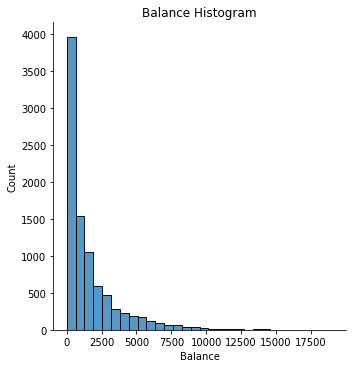

In [278]:
sns.displot(df1.balance,bins= 30,kde=False) # Histogram for balance variable
#plt.figure(figsize=(10,5), fonts)
plt.title('Balance Histogram')
plt.xlabel('Balance')


## 1.2 Report any structure you find and any hypotheses you have about that structure.

The histogram of balance variable shows a power law distribution. There are many customers with balance equal to zero and there are a little customers with high balance in yours credit count.


The matter that the majority maintain the balance in zero is not intrinsic to the low use of the credit card. In fact the ids with most purchase frequency have a balance in zero.

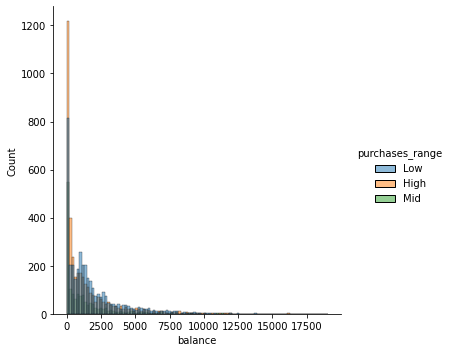

In [279]:
# Generating a classification for  the purchases_frequency ( High, Mid and Low).
cond_p = [
    (df1['purchases_frequency'] >= 0.66) ,
    (df1['purchases_frequency'] >= 0.33) & (df1['purchases_frequency'] <0.66),
    (df1['purchases_frequency'] <= 0.33)]
scale_p= ['High', 'Mid', 'Low']
df1['purchases_range'] = np.select(cond_p, scale_p, default='Not Specified')
# Generating a histogram balance with purchase_frequency classification
sns.displot(df1, x="balance", hue="purchases_range")
plt.title('Balance Histogram by purchases_range )


## 1.3 Report mean and median balance, grouped by year and month of activated_date .




In [280]:
# Create the variables year and moth for activated_date
df1['year_activate'] = df1['activated_date'].astype(str).str[6:10]
df1['month_activate'] = df1['activated_date'].astype(str).str[3:5]
# Now, the data frame is group by year and month for activated_date and the mean and median are calculated.
df1_1=df1.groupby(['year_activate','month_activate']).balance.agg({ 'mean', 'median'})


In [281]:
# Rename columns
df1_2=df1_1.rename(index=str, columns={"mean": "mean_balance", "median": "median_balance"})

In [282]:
#Report
df1_2

mean_balance  median_balance
year_activate month_activate                              
2019          10               2482.234166     1524.409377
              11               1846.847082     1081.065726
              12               2016.605538     1167.863521
2020          01               1853.211613     1175.749847
              02               1744.756667      994.841733
              03               1553.261113      828.954823
              04               1487.733269      910.141912
              05               1214.333732      734.557681
              06                939.789358      475.265493
              07                649.151531      221.203759


# Question 2


## 2.1 Report in a table the following information for customers who activated their account andmade their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance , credit_limit , and a calculated field of cash_advance as a percentage of credit_limit .

In [283]:
df2 = df # Use a new data frame

In [284]:
# first change the format for cust_id, activated_date and ast_payment_date

# cust_id
df2['cust_id1'] = df2['cust_id'].astype(str).str[1:6] # cuts_id only numbers

# activated_date
df2['act_dte1']=pd.to_datetime(df['activated_date']) # change format from ddmmyyy to yyyymmdd
df2['act_dte'] = df['act_dte1'].dt.strftime('%Y-%m') # take only y and m
# last_payment_date
df2['lpyt_dte1']=pd.to_datetime(df['last_payment_date']) # has format dd/mm/YYY
df2['lpyt_dte'] = df['lpyt_dte1'].dt.strftime('%Y-%m-%d')



Now now its necessary report the customers who activated their account and made their last payment during 2020. 
The customer that activated their account in 2019 coud made paymantes in 2020 but it is not part of the requested group, and no exist customer that activated their acount un 2020 and realizaded a payment in 2019.
Therefore,   was selected  activated_date = 2020. 

In [285]:
df2_1 = df2['year_activate'] == "2020"
df2_2 = df2.loc[df2_1] # Filter 2020


In [286]:
# Creating a calculated field of cash_advance as a percentage of credit_limit 
df2_2['percentage_credit_limit'] = df2_2['cash_advance'] / df2_2['credit_limit']


In [287]:
# Selections of variables
df2_3=df2_2[['cust_id1','act_dte1','lpyt_dte','cash_advance','credit_limit','percentage_credit_limit']]



In [288]:
 #Rename columns
df2_3=df2_3.rename(index=str, columns={"cust_id1": "cust_id", "act_dte1": "activated_date","lpyt_dte": "last_payment_date"})

In [289]:
# Result
df2_3

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percentage_credit_limit
2633,12709,2020-01-01,2020-08-05,2431.292076,8000.0,0.303912
2634,12710,2020-01-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01-01,2020-04-26,78.763096,1500.0,0.052509
...,...,...,...,...,...,...
8945,19186,2020-07-31,2020-03-11,0.000000,1000.0,0.000000
8946,19187,2020-07-31,2020-06-09,0.000000,1000.0,0.000000
8947,19188,2020-07-31,2020-03-06,0.000000,1000.0,0.000000
8948,19189,2020-07-31,2020-07-19,36.558778,500.0,0.073118


# Question 3

## 3.1 Build a predictive model for fraud.

The model was created by [Multilayer Neural Network](https://en.wikipedia.org/wiki/Multilayer_perceptron) for a major results

In [290]:
df3 = df # Use a new data frame

In [292]:
# Choosing the qualitatives variables 

df3_1 = df3.drop(['cust_id','activated_date','last_payment_date','purchases_range','year_activate','month_activate',
                  'act_dte1','act_dte',	'lpyt_dte1',	'lpyt_dte','cust_id1'], axis=1)

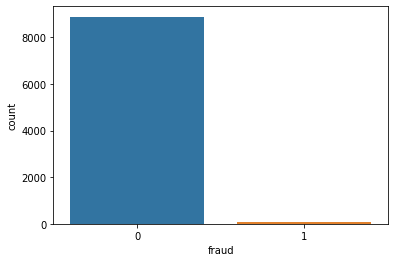

In [293]:
# Analysing the dependent variable. There are not much registers for fraud= 1
sns.countplot(x="fraud", data=df3_1)

With a few registers for frauds cases, is important change this desequilibrium. For this, is necessary [generate](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets) a  best sub group for   sample with more balanced.

In [294]:
# Organizing data names into independent variables and dependent variable
col = df3_1.columns.to_list()
cols = [c for c in col if c not in ["fraud"]]
target = "fraud"


In [296]:
# Independent and dependent variables
X = df3_1[cols]
Y = df3_1[target]

In [297]:
# Realizing  balanced data
subsample = RandomUnderSampler(sampling_strategy=0.5) # fraud are the mitad of the sample
X_sub, Y_sub = subsample.fit_resample(X, Y)
test = pd.DataFrame(Y_sub,columns=['fraud'])

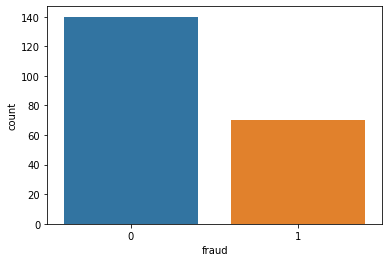

In [298]:
# The new data has a more balanced registers
sns.countplot(x='fraud', data=test)

In [299]:
# Taking data subsets  for train and test 
X_train, X_test, y_train, y_test = train_test_split(X_sub, Y_sub, test_size=0.2, random_state=1)

The Multilayer Neural network was built with 4 layers and 100 nodes in the thirth layers and one in the last layer, the activation function relu permite analizate the non linear comportamietos of the vairables. The sigmoid in the last layer take a only two values zero or one.

In [300]:

model_f = tf.keras.models.Sequential()
model_f.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(17, )))
model_f.add(tf.keras.layers.Dense(units=100, activation='relu'))
model_f.add(tf.keras.layers.Dense(units=100, activation='relu'))
model_f.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [301]:
# A model summary
model_f.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               1800      
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________


In [302]:
# Compiling the model
model_f.compile(optimizer='Adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [303]:
# Iterating the model
epochs_train = model_f.fit(X_train, y_train, epochs = 200, batch_size = 20, validation_split = 0.1)

Epoch 1/200
8/8 [==============================] - 1s 32ms/step - loss: 106.7264 - accuracy: 0.5455 - val_loss: 3.6697 - val_accuracy: 0.8235
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 50.5234 - accuracy: 0.7433 - val_loss: 68.1718 - val_accuracy: 0.8824
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 28.7037 - accuracy: 0.8864 - val_loss: 9.1460 - val_accuracy: 0.9412
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 28.5761 - accuracy: 0.7590 - val_loss: 1.1531 - val_accuracy: 0.9412
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 33.1374 - accuracy: 0.7363 - val_loss: 20.9290 - val_accuracy: 0.8824
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 34.2759 - accuracy: 0.8636 - val_loss: 57.8090 - val_accuracy: 0.8235
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 33.7965 - accuracy: 0.8263 - val_loss: 2.2986 - val_accuracy: 0.9412
Epoch 8/200
8/8

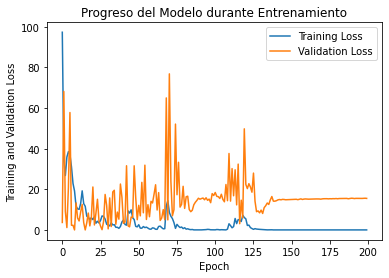

In [304]:
# Show the accuracy of the model
plt.plot(epochs_train.history['loss'])
plt.plot(epochs_train.history['val_loss'])
plt.title('Model progress')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [305]:
# Evaluating the model
model_f.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 36.9988 - accuracy: 0.5952


[36.99883270263672, 0.5952380895614624]

In [306]:
#Prediction table
predictions=model_f.predict(X_test)
y_pred = model_f.predict(X_test)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[20  9]
 [ 8  5]]
0.5952380952380952


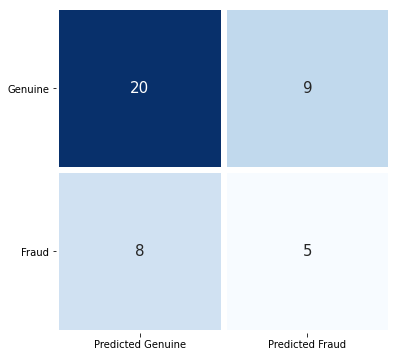

In [307]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Genuine', 'Fraud'], xticklabels = ['Predicted Genuine', 'Predicted Fraud'])
plt.yticks(rotation = 0)
plt.show()

In [308]:
#Calculating the ROC curve
y_pred_nn_proba = model_f.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.48275862068965525


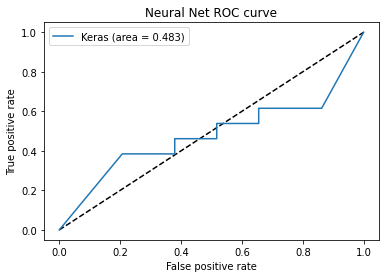

In [309]:
#Visualizing ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

The model has a low prediction, but this model puede mejorar with a increase data registers and change the configuration of the MNN.

## 3.2 What explanatory variable was the most powerful predictor for fraud?

The variable with the most powerful predictor for fraud  is the Purchase variable with 0.52 of correlation.




In [311]:
# Correlation matrix
corr_matrix = df3_1.corr()
corr_matrix

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
balance,1.000000,0.322451,0.181277,0.164346,0.126515,0.493770,-0.077861,0.073198,-0.063085,0.449188,0.385133,0.154416,0.531257,0.322797,0.393991,-0.318998,0.072673,0.203263
balance_frequency,0.322451,1.000000,0.133674,0.104323,0.124292,0.098133,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114238,-0.095082,0.119776,0.035241
purchases,0.181277,0.133674,1.000000,0.916845,0.679896,-0.050781,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093412,0.180379,0.086288,0.520895
oneoff_purchases,0.164346,0.104323,0.916845,1.000000,0.330622,-0.031021,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048540,0.132763,0.064150,0.475725
installments_purchases,0.126515,0.124292,0.679896,0.330622,1.000000,-0.063163,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131551,0.182569,0.086143,0.357483
cash_advance,0.493770,0.098133,-0.050781,-0.031021,-0.063163,1.000000,-0.214355,-0.087100,-0.175442,0.623196,0.651609,-0.074551,0.302032,0.449578,0.138803,-0.151919,-0.068972,0.199611
purchases_frequency,-0.077861,0.229715,0.393017,0.264937,0.442418,-0.214355,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002900,0.305802,0.061506,0.071416
oneoff_purchases_frequency,0.073198,0.202415,0.498430,0.524891,0.214042,-0.087100,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.030064,0.157531,0.082466,0.120314
purchases_installments_frequency,-0.063085,0.176079,0.315567,0.127729,0.511351,-0.175442,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029579,0.250087,0.073275,0.071719
cash_advance_frequency,0.449188,0.191873,-0.120143,-0.082628,-0.132318,0.623196,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097788,-0.249773,-0.133372,0.070455
